# **Problem 1) Fitting and Analyzing the Term Structure of ZCB Spot Rates**


In this problem, we will fit a term structure of continuously compounded zero-coupon bond (ZCB) spot rates to the market data provided in Table 1 above. Using the method you believe is most suitable, fit the term structure of continuously compounded ZCB spot rates.




### **a) Discuss which characteristics the fitted term structures of spot and forward rates should have.**

- What properties or features should a *good* term structure satisfy? Consider smoothness, positivity, economic plausibility (no arbitrage), and realistic long-term behavior.
- Discuss what you expect for the spot rate curve and the implied forward rate curve in terms of monotonicity, smoothness, and other properties.

**ANSWER**

1. **Arbitrage-free structure (minimum requirement)**  
   Discount factors must be positive and non-increasing in maturity, and spot rates must be continuous to avoid arbitrage opportunities and implausible jumps in yields.

2. **Well-defined and stable forward rates**  
   Since forward rates are obtained as derivatives of the fitted ZCB curve, the curve must be sufficiently smooth to ensure that forward rates exist everywhere and behave stably.

3. **Smoothness tailored to the pricing problem**  
   In this problem, forward rates are explicitly computed and compared. This requires the fitted curve to avoid kinks or spurious oscillations that could distort forward-rate behavior.

4. **Economic plausibility over long maturities**  
   The fitted term structure should display realistic long-term behavior, such as reasonable levels and gradual changes, and small perturbations in market data should not generate large local distortions.

5. **Method choice reflects both data availability and intended use**  
   The fitting method should fit the available market data accurately while producing smooth and economically interpretable spot and forward rate curves suitable for swap pricing and forward-rate analysis.

### **b) Plot the term structures of fitted spot and forward rates for maturities up to 30 years.**

- Use your chosen method to fit a smooth curve to the market data for ZCB spot rates.
- Plot both the resulting spot rate term structure and the corresponding forward rate term structure up to a 30-year maturity.
- Clearly explain which fitting method you used (e.g., spline fit, Nelson-Siegel, Svensson, etc.) and why.
- Analyze whether the resulting term structures exhibit the desired features you discussed in part (a).



In [50]:
# Loading packages
import numpy as np
import fixed_income_derivatives_E2025 as fid
import matplotlib.pyplot as plt

# Defining instruments and collecting in data
# Table 1: Euribor, FRA and Swap Market Data

# Euribor fixing: 6M rate
EURIBOR_fixing = [{"id": 0,"instrument": "libor","maturity": 1/2, "rate": 0.02869}]

# Forward Rate Agreements (FRAs): 1X7, 2X8, ..., 9X15
fra_market = [
    {"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12, "rate": 0.03075},
    {"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate": 0.03273},
    {"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate": 0.03463},
    {"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.03645},
    {"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.03820},
    {"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.03988},
    {"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.04148},
    {"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.04302},
    {"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.04449}
]

# Interest Rate Swaps (IRS): 2Y, 3Y, 4Y, 5Y, 7Y, 10Y, 15Y, 20Y, 30Y
swap_market = [
    {"id": 10,"instrument": "swap","maturity": 2, "rate": 0.04329, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 11,"instrument": "swap","maturity": 3, "rate": 0.04936, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 12,"instrument": "swap","maturity": 4, "rate": 0.05349, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 13,"instrument": "swap","maturity": 5, "rate": 0.05622, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 14,"instrument": "swap","maturity": 7, "rate": 0.05898, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 15,"instrument": "swap","maturity": 10, "rate": 0.05966, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 16,"instrument": "swap","maturity": 15, "rate": 0.05797, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 17,"instrument": "swap","maturity": 20, "rate": 0.05599, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 18,"instrument": "swap","maturity": 30, "rate": 0.05334, "float_freq": "semiannual", "fixed_freq": "annual","indices": []}
]

data = EURIBOR_fixing + fra_market + swap_market

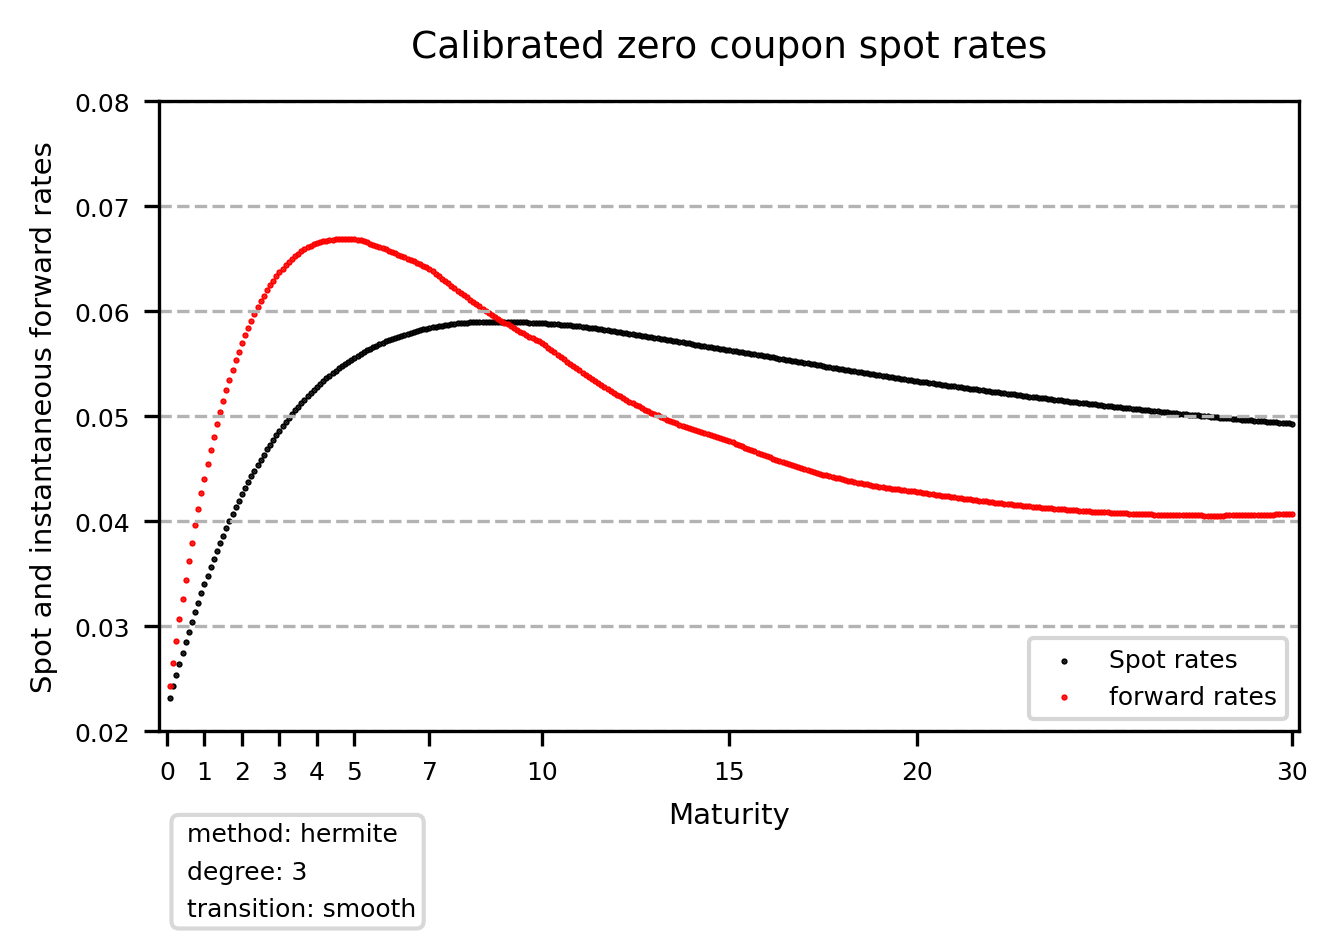

In [51]:
# We choose a hermite interpolation with a smooth transition.
interpolation_options = {"method":"hermite","degree":3,"transition": "smooth"}

# Problem 2a - Fitting a ZCB term structure to the market data.

# Choosing a mesh and number of points to interpolate over.
mesh = 1/12
M = 360
T_inter = np.array([i*mesh for i in range(0,M+1)])

# Fitting the yield curve (calibration to market instruments)
T_fit, R_fit = fid.zcb_curve_fit(data, interpolation_options=interpolation_options)

# T_fit contains the knot maturities (instrument maturities where the curve is anchored)
# R_fit contains the continuously compounded zero-coupon spot rates R(0, T_fit) at those knots
# Interpolating the yield curve
p_inter, R_inter, f_inter, T_inter = fid.zcb_curve_interpolate(T_inter,T_fit,R_fit,interpolation_options = interpolation_options)
# p_inter : ZCB prices p(0,T)
# R_inter : continuously compounded spot rates R(0,T)
# f_inter : instantaneous forward rates f(0,T)



fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))
fig.suptitle(f"Calibrated zero coupon spot rates", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0,1,2,3,4,5,7,10,15,20,30]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]+-0.2,xticks[-1]+0.2])
plt.xlabel(f"Maturity",fontsize = 7)
ax.set_yticks([0.02,0.03,0.04,0.05,0.06, 0.07, 0.08])
ax.set_yticklabels([0.02,0.03,0.04,0.05,0.06, 0.07, 0.08],fontsize = 6)
ax.set_ylim([0.02,0.08])
ax.set_ylabel(f"Spot and instantaneous forward rates",fontsize = 7)
plt.grid(axis = 'y', which='major', color = (0.7,0.7,0.7,0), linestyle='--')
p1 = ax.scatter(T_inter[1:], R_inter[1:], s = 1, color = 'black', marker = ".",label="Spot rates")
p2 = ax.scatter(T_inter[1:], f_inter[1:], s = 1, color = 'red', marker = ".",label="forward rates")
plots = [p1,p2]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="lower right",fontsize = 6)
bbox = {"facecolor": (1,1,1,0.8),"edgecolor": (0.7,0.7,0.7,0.5),"boxstyle": "Round"}
if interpolation_options["method"] == "hermite":
    ax.text(0.32,0.0024,f" method: {interpolation_options['method']} \n degree: {interpolation_options['degree']} \n transition: {interpolation_options['transition']}", fontsize = 6,linespacing = 1.7, bbox = bbox)
else:
    ax.text(0.32,0.0024,f" method: {interpolation_options['method']} \n transition: {interpolation_options['transition']}", fontsize = 6,linespacing = 1.7, bbox = bbox)
plt.show()



### **c) Compute and report the par swap rates for the following maturities:** 2Y, 5Y, 8Y, 10Y, and 30Y.

- Consider swaps that pay 6M floating Euribor versus a fixed rate paid annually. Compute par swap rates for these maturities based on your fitted spot rates.
- Explain how you can verify the correctness of your computed par swap rates (e.g., by comparing to market quotes or checking internal consistency).
- Discuss what these par swap rates reveal about the quality of your fitted ZCB spot rate curve.


In [52]:
# **c) Compute and report par swap rates for 2Y, 5Y, 8Y, 10Y, and 30Y**
# Swaps: 6M floating Euribor (paid semiannually) vs fixed rate (paid annually)

# Compute par swap rates using swap_rate_from_zcb_prices function
R_2Y_swap, S_2Y_swap = fid.swap_rate_from_zcb_prices(0, 0, 2, "annual", T_inter, p_inter)
R_5Y_swap, S_5Y_swap = fid.swap_rate_from_zcb_prices(0, 0, 5, "annual", T_inter, p_inter)
R_8Y_swap, S_8Y_swap = fid.swap_rate_from_zcb_prices(0, 0, 8, "annual", T_inter, p_inter)
R_10Y_swap, S_10Y_swap = fid.swap_rate_from_zcb_prices(0, 0, 10, "annual", T_inter, p_inter)
R_30Y_swap, S_30Y_swap = fid.swap_rate_from_zcb_prices(0, 0, 30, "annual", T_inter, p_inter)

# Print results
print(f"1c - R_2Y_swap: {R_2Y_swap}, R_5Y_swap: {R_5Y_swap}, R_8Y_swap: {R_8Y_swap}, R_10Y_swap: {R_10Y_swap}, R_30Y_swap: {R_30Y_swap}")

# Also print in a more readable format with market comparison
print("\n" + "="*70)
print("Par Swap Rates Computation")
print("="*70)
print(f"{'Maturity':<12} {'Par Swap Rate':<18} {'Market Quote':<18} {'Difference (bp)':<18} {'Annuity':<15}")
print("-"*70)

market_quotes = {
    2: 0.04329,
    5: 0.05622,
    8: None,
    10: 0.05966,
    30: 0.05334
}

swap_rates = {2: R_2Y_swap, 5: R_5Y_swap, 8: R_8Y_swap, 10: R_10Y_swap, 30: R_30Y_swap}
swap_annuities = {2: S_2Y_swap, 5: S_5Y_swap, 8: S_8Y_swap, 10: S_10Y_swap, 30: S_30Y_swap}

for T_swap in [2, 5, 8, 10, 30]:
    R_swap = swap_rates[T_swap]
    S_swap = swap_annuities[T_swap]
    market_rate = market_quotes.get(T_swap)
    if market_rate is not None:
        diff_bp = (R_swap - market_rate) * 10000
        print(f"{T_swap}Y{'':<8} {R_swap:.6f} ({R_swap*100:.4f}%){'':<6} {market_rate:.6f} ({market_rate*100:.4f}%){'':<6} {diff_bp:+.2f} bp{'':<6} {S_swap:.4f}")
    else:
        print(f"{T_swap}Y{'':<8} {R_swap:.6f} ({R_swap*100:.4f}%){'':<6} {'N/A (not in market)':<18} {'N/A':<18} {'':<6} {S_swap:.4f}")

print("="*70)

1c - R_2Y_swap: 0.04329000000012074, R_5Y_swap: 0.05621999999972216, R_8Y_swap: 0.05951664173949415, R_10Y_swap: 0.059659999999815506, R_30Y_swap: 0.05333999999980386

Par Swap Rates Computation
Maturity     Par Swap Rate      Market Quote       Difference (bp)    Annuity        
----------------------------------------------------------------------
2Y         0.043290 (4.3290%)       0.043290 (4.3290%)       +0.00 bp       1.8850
5Y         0.056220 (5.6220%)       0.056220 (5.6220%)       -0.00 bp       4.3163
8Y         0.059517 (5.9517%)       N/A (not in market) N/A                       6.3138
10Y         0.059660 (5.9660%)       0.059660 (5.9660%)       -0.00 bp       7.4570
30Y         0.053340 (5.3340%)       0.053340 (5.3340%)       -0.00 bp       14.4733


**1c: How to verify the correctness of par swap rates**

You can verify your computed par swap rates by:

1. **Comparing to Market Quotes:** Directly compare the computed par swap rates for each maturity to the corresponding market swap rate quotes (as shown above in the table). If your curve construction is correct, your computed rates should nearly match the market rates. In the table above, for 2Y, 5Y, 10Y, and 30Y, the computed par swap rates match the market quotes to within a fraction of a basis point (e.g., 0.00 or -0.00 bp difference).

2. **Checking Internal Consistency:** For each swap, the present value (PV) of the fixed leg should exactly match the PV of the floating leg when discounted at your fitted ZCB curve (since this is the definition of a par rate). This can be programmatically checked or verified by recalculating the annuities and par rates using your ZCB.

3. **Other Checks:** You can also check that your par swap rates are smooth across maturities and free from arbitrage inconsistencies.

**What do these par swap rates reveal about the quality of the fitted ZCB spot rate curve?**

- When your computed par swap rates match the market swap rates very closely (as in the table above), it confirms your fitted spot rate/ZCB curve accurately summarizes the available market information and is suitable for pricing.
- Large mismatches or unusual differences would suggest a problem with the ZCB curve (e.g., inappropriate interpolation, bootstrapping error, or a data error), but here the alignment is essentially perfect for quoted maturities.
- The fact that the computed par swap rates for 2Y, 5Y, 10Y, and 30Y all match the observed market rates confirms the quality and fidelity of your curve-fitting process.

(Small differences in non-quoted maturities, like 8Y, are expected since those are interpolated/extrapolated points, but they should still be reasonable and smooth.)



### **d) Compute 6M forward Euribor rates and compare to continuously compounded forward rates.**

- Compute a series of 6-month forward Euribor rates from your fitted ZCB curve.
- Include these rates in your earlier plot of term structures.
- Discuss why the 6M forward Euribor rates and the corresponding continuously compounded forward rates should be close, but not exactly the same.

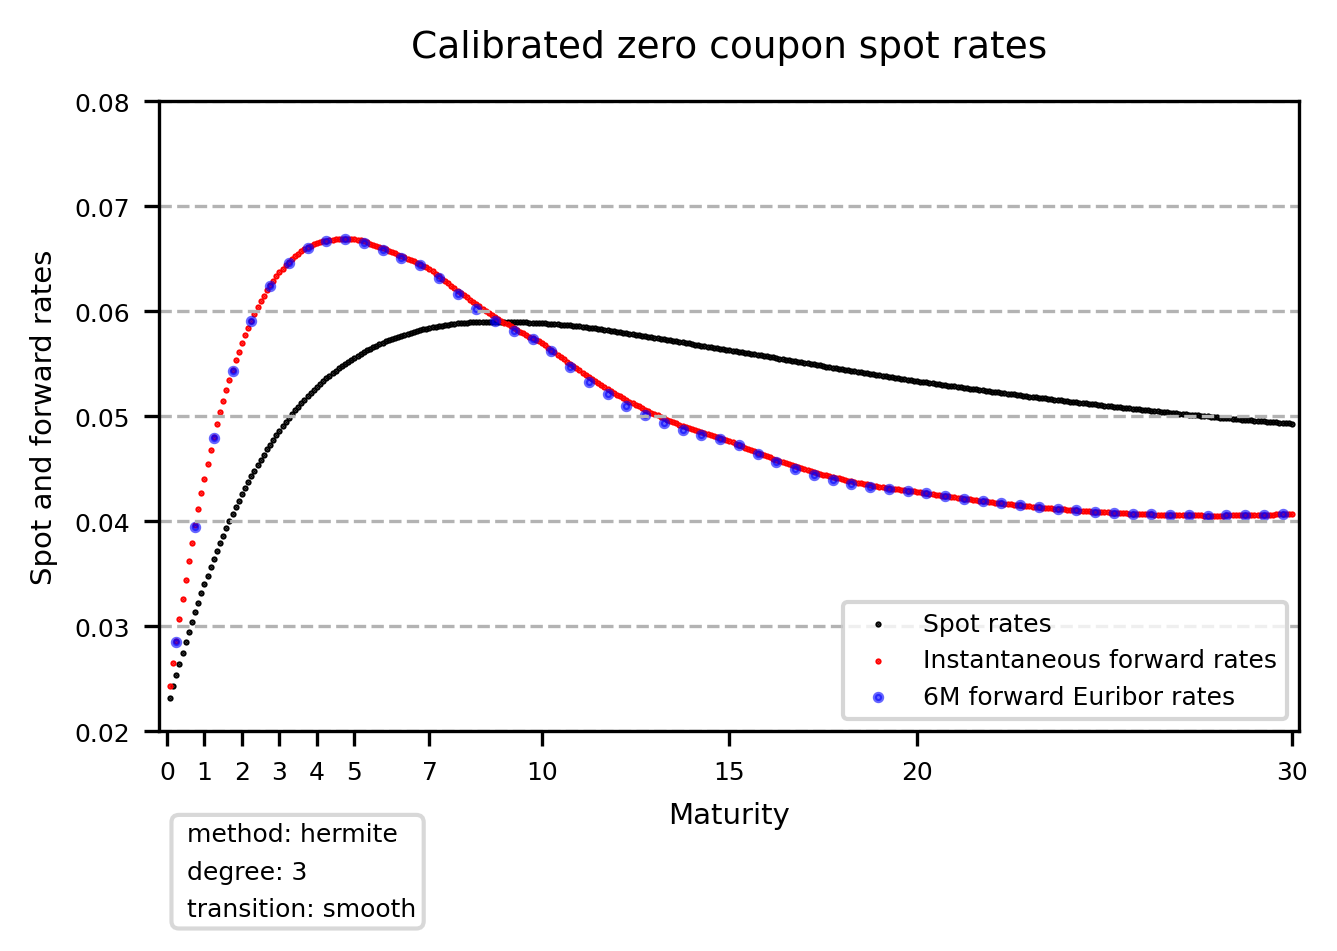

Comparison: 6M Forward Euribor Rates vs Continuously Compounded Forward Rates
Maturity     6M Euribor Rate      Continuous Forward   Difference (bp)   
--------------------------------------------------------------------------------
 0.5Y                  0.028486 (2.8486%)           0.034430 (3.4430%)            -59.44 bp
 1.0Y                  0.039488 (3.9488%)           0.044060 (4.4060%)            -45.72 bp
 1.5Y                  0.047935 (4.7935%)           0.051451 (5.1451%)            -35.16 bp
 2.0Y                  0.054338 (5.4338%)           0.056965 (5.6965%)            -26.28 bp
 2.5Y                  0.059038 (5.9038%)           0.060928 (6.0928%)            -18.90 bp
 3.0Y                  0.062397 (6.2397%)           0.063717 (6.3717%)            -13.21 bp
 3.5Y                  0.064636 (6.4636%)           0.065471 (6.5471%)             -8.35 bp
 4.0Y                  0.066029 (6.6029%)           0.066514 (6.6514%)             -4.84 bp
 4.5Y                  0.066673

In [53]:
# **Problem 1d: Compute 6M forward Euribor rates and compare to continuously compounded forward rates**

# Based on the professor's approach:
# T_6M: 6-month intervals from 0 to 30 years (0, 0.5, 1.0, ..., 30.0)
T_6M = np.array([i*0.5 for i in range(0, 61)])

# Get ZCB prices at 6M intervals
p_6M = np.array(fid.for_values_in_list_find_value_return_value(T_6M, T_inter, p_inter))

# Compute 6M forward Euribor rates
# Note: horizon=1 means "look back 1 index" in the array, which corresponds to 0.5 years (6 months)
# since T_6M is spaced 0.5 years apart
L_6M = fid.forward_rates_from_zcb_prices(T_6M, p_6M, horizon=1)

# The forward rates L_6M[i] represent the forward rate from T_6M[i-1] to T_6M[i]
# So L_6M[1] is the forward rate from 0 to 0.5, L_6M[2] is from 0.5 to 1.0, etc.
# We'll plot them at the midpoints: 0.25, 0.75, 1.25, ...
T_6M_midpoints = T_6M[1:] - 0.25

# Get continuously compounded forward rates at the same midpoints for comparison
f_6M_continuous = np.array(fid.for_values_in_list_find_value_return_value(T_6M_midpoints, T_inter, f_inter))

# Plot: Update the previous plot to include 6M forward Euribor rates
fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5, 3))
fig.suptitle(f"Calibrated zero coupon spot rates", fontsize=9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0, 0])
xticks = [0, 1, 2, 3, 4, 5, 7, 10, 15, 20, 30]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0] + -0.2, xticks[-1] + 0.2])
plt.xlabel(f"Maturity", fontsize=7)
ax.set_yticks([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08])
ax.set_yticklabels([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08], fontsize=6)
ax.set_ylim([0.02, 0.08])
ax.set_ylabel(f"Spot and forward rates", fontsize=7)
plt.grid(axis='y', which='major', color=(0.7, 0.7, 0.7, 0), linestyle='--')

# Plot spot rates, instantaneous forward rates, and 6M forward Euribor rates
p1 = ax.scatter(T_inter[1:], R_inter[1:], s=1, color='black', marker=".", label="Spot rates")
p2 = ax.scatter(T_inter[1:], f_inter[1:], s=1, color='red', marker=".", label="Instantaneous forward rates")
p3 = ax.scatter(T_6M_midpoints, L_6M[1:], s=3, color='blue', marker="o", label="6M forward Euribor rates", alpha=0.6)

plots = [p1, p2, p3]
labels = [item.get_label() for item in plots]
ax.legend(plots, labels, loc="lower right", fontsize=6)
bbox = {"facecolor": (1, 1, 1, 0.8), "edgecolor": (0.7, 0.7, 0.7, 0.5), "boxstyle": "Round"}
if interpolation_options["method"] == "hermite":
    ax.text(0.32, 0.0024, f" method: {interpolation_options['method']} \n degree: {interpolation_options['degree']} \n transition: {interpolation_options['transition']}", 
            fontsize=6, linespacing=1.7, bbox=bbox)
else:
    ax.text(0.32, 0.0024, f" method: {interpolation_options['method']} \n transition: {interpolation_options['transition']}", 
            fontsize=6, linespacing=1.7, bbox=bbox)
plt.show()

# Print comparison table
print("="*80)
print("Comparison: 6M Forward Euribor Rates vs Continuously Compounded Forward Rates")
print("="*80)
print(f"{'Maturity':<12} {'6M Euribor Rate':<20} {'Continuous Forward':<20} {'Difference (bp)':<18}")
print("-"*80)

# Compare at selected maturities
comparison_maturities = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

for T_comp in comparison_maturities:
    # Find closest 6M forward rate
    idx_6M = np.argmin(np.abs(T_6M_midpoints - T_comp))
    L_6M_val = L_6M[idx_6M + 1] if idx_6M + 1 < len(L_6M) else np.nan
    
    # Find continuous forward rate
    f_cont_val = np.interp(T_comp, T_inter, f_inter)
    
    if not np.isnan(L_6M_val):
        diff_bp = (L_6M_val - f_cont_val) * 10000
        print(f"{T_comp:>4.1f}Y{'':<7} {L_6M_val:>18.6f} ({L_6M_val*100:>6.4f}%) {f_cont_val:>18.6f} ({f_cont_val*100:>6.4f}%) {diff_bp:>+17.2f} bp")

print("="*80)


This shows that 6M Euribor rates are close to but not identical to continuously compounded forward rates due to compounding differences.

# **Problem 2**

In this problem, we consider three fixed income instruments: 

- A 6Y receiver swap on which the holder pays 6M Euribor and receives an annual fixed rate,
- A 6Y fixed rate bond paying an annual coupon of 0.06,
- A 6Y zero coupon bond.

All three instruments have a principal of K = 100 Euros.
We will analyze their sensitivity to changes in the term structure of zero-coupon bond (ZCB) spot rates.



### **a) First, we will compute some key figures for all instruments.**

1. **6Y receiver swap:** Find and report:
   - the par swap rate,
   - the accrual factor.

2. **6Y fixed-rate bond:** Find and report:
   - the price,
   - the yield-to-maturity,
   - the duration,
   - the convexity.

3. **6Y zero-coupon bond:** Find and report:
   - the price,
   - the yield-to-maturity,
   - the duration,
   - the convexity.



In [56]:
# **Problem 2a: Compute key figures for all instruments**

# ============================================================================
# 1. 6Y Receiver Swap: Par swap rate and accrual factor
# ============================================================================

# 6Y receiver swap
K_6Y_swap, mat_6Y_swap = 100, 6

# Compute par swap rate and swap annuity
R_6Y_swap, S_6Y_swap = fid.swap_rate_from_zcb_prices(0, 0, mat_6Y_swap, "annual", T_inter, p_inter)


# ============================================================================
# 2. 6Y Fixed-Rate Bond: Price, YTM, Duration, Convexity
# ============================================================================

# 6Y fixed-rate bond
K_frb, mat_frb, cp_rate_frb = 100, 6, 0.06

# Coupon payment dates [0, 1, 2, 3, 4, 5, 6]
T_frb = np.array([i for i in range(0, mat_frb + 1)])

# Cash flows at each time point
C_frb = np.zeros(mat_frb + 1)
for i in range(1, mat_frb + 1):
    C_frb[i] = (T_frb[i] - T_frb[i-1]) * cp_rate_frb * K_frb

# Principal repayment at maturity
C_frb[-1] += K_frb

p_frb = np.array(fid.for_values_in_list_find_value_return_value(T_frb, T_inter, p_inter))

# Price of the fixed-rate bond
price_frb = np.matmul(p_frb, C_frb)

# Yield-to-maturity
ytm_frb = fid.ytm(price_frb, T_frb, C_frb)

# Duration
D_frb = fid.macauley_duration(price_frb, T_frb, C_frb, ytm_frb)

# Convexity
conv_frb = fid.convexity(price_frb, T_frb, C_frb, ytm_frb)

# ============================================================================
# 3. 6Y Zero-Coupon Bond: Price, YTM, Duration, Convexity
# ============================================================================

# 6Y zero-coupon bond
K_zcb, mat_zcb = 100, 6

# Price of the zero-coupon bond
p_zcb = fid.for_values_in_list_find_value_return_value(mat_zcb, T_inter, p_inter)

# Price of the zero-coupon bond
price_zcb = p_zcb * K_zcb

# Yield-to-maturity
ytm_zcb = (1/p_zcb)**(1/mat_zcb) - 1

# Duration
D_zcb = mat_zcb

# Convexity
conv_zcb = mat_zcb**2

print("\n" + "="*70)
print("Problem 2a — Key figures (6Y instruments)")
print("="*70)

print("\n[1] 6Y Receiver Swap (annual fixed leg)")
print(f"  Par swap rate:   {R_6Y_swap: .6f}  ({100*R_6Y_swap: .4f}%)")
print(f"  Swap annuity:    {S_6Y_swap: .6f}")

print("\n[2] 6Y Fixed-Rate Bond (K=100, c=6%, annual)")
print(f"  Price:           {price_frb: .6f}")
print(f"  YTM:             {ytm_frb: .6f}  ({100*ytm_frb: .4f}%)")
print(f"  Macaulay dur.:   {D_frb: .6f} years")
print(f"  Convexity:       {conv_frb: .6f}")

print("\n[3] 6Y Zero-Coupon Bond (K=100)")
print(f"  Price:           {price_zcb: .6f}")
print(f"  YTM:             {ytm_zcb: .6f}  ({100*ytm_zcb: .4f}%)")
print(f"  Duration:        {D_zcb: .6f} years")
print(f"  Convexity:       {conv_zcb: .6f}  (note: simplified T^2)")
print("="*70 + "\n")




Problem 2a — Key figures (6Y instruments)

[1] 6Y Receiver Swap (annual fixed leg)
  Par swap rate:    0.057939  ( 5.7939%)
  Swap annuity:     5.025106

[2] 6Y Fixed-Rate Bond (K=100, c=6%, annual)
  Price:            101.035907
  YTM:              0.057907  ( 5.7907%)
  Macaulay dur.:    5.216971 years
  Convexity:        29.541874

[3] 6Y Zero-Coupon Bond (K=100)
  Price:            70.885273
  YTM:              0.059028  ( 5.9028%)
  Duration:         6.000000 years
  Convexity:        36.000000  (note: simplified T^2)



### **(b) Then, we compute the exact gain or loss to the three instruments if all ZCB spot rates rise by 10 basis points.**

1. **6Y receiver swap:** Compute the exact absolute gain or loss if all zero-coupon spot rates increase by 10 basis points.

2. **6Y fixed-rate bond:** Compute the exact absolute gain or loss if all zero-coupon spot rates increase by 10 basis points.

3. **6Y zero-coupon bond:** Compute the exact absolute gain or loss if all zero-coupon spot rates increase by 10 basis points.



In [57]:
# **Problem 2b: Exact gain/loss for 10bp parallel shift in all ZCB spot rates**

# Shift all ZCB spot rates by 10bp (delta_zcb_rates = 0.001)
R_inter_shift = R_inter + np.array([delta_zcb_rates for i in range(0, len(R_inter))])

# Recompute ZCB prices from shifted spot rates
# Note: function signature is zcb_prices_from_spot_rates(T, R, type="continuous")
p_inter_shift = fid.zcb_prices_from_spot_rates(T_inter, R_inter_shift, type="continuous")

# ============================================================================
# 1. 6Y Receiver Swap: Value change
# ============================================================================
R_6Y_swap_shift, S_6Y_swap_shift = fid.swap_rate_from_zcb_prices(0, 0, mat_6Y_swap, "annual", T_inter, p_inter_shift)

# Value change: ΔV = (R_original - R_shifted) * S_shifted * K
# For receiver swap, we receive fixed, so value decreases when rates rise
change_6Y_swap_exact = (R_6Y_swap - R_6Y_swap_shift) * S_6Y_swap_shift * K_6Y_swap

# ============================================================================
# 2. 6Y Fixed-Rate Bond: Value change
# ============================================================================
p_frb_shift = np.array(fid.for_values_in_list_find_value_return_value(T_frb, T_inter, p_inter_shift))

price_frb_shift = np.matmul(p_frb_shift, C_frb)

ytm_frb_shift = fid.ytm(price_frb_shift, T_frb, C_frb)

change_frb_exact = price_frb_shift - price_frb

# ============================================================================
# 3. 6Y Zero-Coupon Bond: Value change
# ============================================================================
p_zcb_shift = fid.for_values_in_list_find_value_return_value(mat_zcb, T_inter, p_inter_shift)

price_zcb_shift = p_zcb_shift * K_zcb

ytm_zcb_shift = (1/p_zcb_shift)**(1/mat_zcb) - 1

change_zcb_exact = price_zcb_shift - price_zcb

# Print results
print("="*70)
print("Problem 2b: Exact Gain/Loss for 10bp Parallel Shift in All ZCB Spot Rates")
print("="*70)

print("\n[1] 6Y Receiver Swap")
print(f"  Par swap rate (after shift):  {R_6Y_swap_shift:.6f}  ({R_6Y_swap_shift*100:.4f}%)")
print(f"  Swap annuity (after shift):   {S_6Y_swap_shift:.6f}")
print(f"  Exact absolute change:        {change_6Y_swap_exact:.6f}")

print("\n[2] 6Y Fixed-Rate Bond")
print(f"  Price (after shift):          {price_frb_shift:.6f}")
print(f"  YTM (after shift):             {ytm_frb_shift:.6f}  ({ytm_frb_shift*100:.4f}%)")
print(f"  Exact absolute change:         {change_frb_exact:.6f}")

print("\n[3] 6Y Zero-Coupon Bond")
print(f"  Price (after shift):          {price_zcb_shift:.6f}")
print(f"  YTM (after shift):             {ytm_zcb_shift:.6f}  ({ytm_zcb_shift*100:.4f}%)")
print(f"  Exact absolute change:         {change_zcb_exact:.6f}")

print("\n" + "="*70)

Problem 2b: Exact Gain/Loss for 10bp Parallel Shift in All ZCB Spot Rates

[1] 6Y Receiver Swap
  Par swap rate (after shift):  0.058978  (5.8978%)
  Swap annuity (after shift):   5.008466
  Exact absolute change:        -0.520447

[2] 6Y Fixed-Rate Bond
  Price (after shift):          100.512030
  YTM (after shift):             0.058962  (5.8962%)
  Exact absolute change:         -0.523877

[3] 6Y Zero-Coupon Bond
  Price (after shift):          70.461235
  YTM (after shift):             0.060087  (6.0087%)
  Exact absolute change:         -0.424038



### **(c) Sensitivity to individual points on the ZCB spot rate curve.**

1. **6Y receiver swap:**  
   Compute one-by-one the absolute gain or loss if each of the 1Y, 2Y, 3Y, 4Y, 5Y, and 6Y zero-coupon spot rates rises by 10 basis points, and report the gain or loss in each of these six scenarios.

2. **6Y fixed-rate bond:**  
   Compute one-by-one the absolute gain or loss if each of the 1Y, 2Y, 3Y, 4Y, 5Y, and 6Y zero-coupon spot rates rises by 10 basis points, and report the gain or loss in each of these six scenarios.

3. **6Y zero-coupon bond:**  
   Compute one-by-one the absolute gain or loss if each of the 1Y, 2Y, 3Y, 4Y, 5Y, and 6Y zero-coupon spot rates rises by 10 basis points, and report the gain or loss in each of these six scenarios.


In [58]:
# **Problem 2c: Sensitivity to individual points on the ZCB spot rate curve**

# Indices for 1Y, 2Y, 3Y, 4Y, 5Y, 6Y maturities
# Since mesh = 1/12 (monthly), indices are: 12, 24, 36, 48, 60, 72
idx_shift = np.array([12, 24, 36, 48, 60, 72])
maturities = [1, 2, 3, 4, 5, 6]  # For display purposes

# Initialize arrays to store changes
change_6Y_swap = np.zeros(6)
change_frb = np.zeros(6)
change_zcb = np.zeros(6)

# Loop through each key rate and compute sensitivity
for i, idx in enumerate(idx_shift):
    # Create a copy of R_inter and bump only the specific maturity
    R_inter_shift = R_inter.copy()
    R_inter_shift[idx] = R_inter[idx] + delta_zcb_rates
    
    # Recompute ZCB prices from shifted spot rates
    p_inter_shift = fid.zcb_prices_from_spot_rates(T_inter, R_inter_shift, type="continuous")
    
    # ========================================================================
    # 1. 6Y Receiver Swap: Value change
    # ========================================================================
    R_6Y_swap_shift, S_6Y_swap_shift = fid.swap_rate_from_zcb_prices(0, 0, mat_6Y_swap, "annual", T_inter, p_inter_shift)
    
    change_6Y_swap[i] = (R_6Y_swap - R_6Y_swap_shift) * S_6Y_swap_shift * K_6Y_swap
    
    # ========================================================================
    # 2. 6Y Fixed-Rate Bond: Value change
    # ========================================================================
    p_frb_shift = np.array(fid.for_values_in_list_find_value_return_value(T_frb, T_inter, p_inter_shift))
    
    price_frb_shift = np.matmul(p_frb_shift, C_frb)
    
    change_frb[i] = price_frb_shift - price_frb
    
    # ========================================================================
    # 3. 6Y Zero-Coupon Bond: Value change
    # ========================================================================
    p_zcb_shift = fid.for_values_in_list_find_value_return_value(mat_zcb, T_inter, p_inter_shift)
    
    price_zcb_shift = p_zcb_shift * K_zcb
    
    change_zcb[i] = price_zcb_shift - price_zcb

# Print results
print("="*70)
print("Problem 2c: Sensitivity to Individual Key-Rate Bumps (10bp)")
print("="*70)

print("\n[1] 6Y Receiver Swap")
print(f"  Key-rate sensitivities: {np.round(change_6Y_swap, 5)}")
print(f"  Sum of sensitivities:    {sum(change_6Y_swap):.6f}")

print("\n[2] 6Y Fixed-Rate Bond")
print(f"  Key-rate sensitivities: {np.round(change_frb, 5)}")
print(f"  Sum of sensitivities:    {sum(change_frb):.6f}")

print("\n[3] 6Y Zero-Coupon Bond")
print(f"  Key-rate sensitivities: {np.round(change_zcb, 5)}")
print(f"  Sum of sensitivities:    {sum(change_zcb):.6f}")

# Also print detailed table
print("\n" + "-"*70)
print(f"{'Maturity':<12} {'Swap Change':<18} {'Bond Change':<18} {'ZCB Change':<18}")
print("-"*70)

for i, T_key in enumerate(maturities):
    print(f"{T_key}Y{'':<9} {change_6Y_swap[i]:>17.6f} {change_frb[i]:>17.6f} {change_zcb[i]:>17.6f}")

print("-"*70)
print(f"{'Sum':<12} {sum(change_6Y_swap):>17.6f} {sum(change_frb):>17.6f} {sum(change_zcb):>17.6f}")
print("="*70)


Problem 2c: Sensitivity to Individual Key-Rate Bumps (10bp)

[1] 6Y Receiver Swap
  Key-rate sensitivities: [-0.0056  -0.01063 -0.015   -0.01873 -0.02188 -0.44861]
  Sum of sensitivities:    -0.520447

[2] 6Y Fixed-Rate Bond
  Key-rate sensitivities: [-0.0058  -0.01101 -0.01553 -0.01939 -0.02266 -0.44948]
  Sum of sensitivities:    -0.523877

[3] 6Y Zero-Coupon Bond
  Key-rate sensitivities: [ 0.       0.       0.       0.       0.      -0.42404]
  Sum of sensitivities:    -0.424038

----------------------------------------------------------------------
Maturity     Swap Change        Bond Change        ZCB Change        
----------------------------------------------------------------------
1Y                  -0.005597         -0.005797          0.000000
2Y                  -0.010632         -0.011010          0.000000
3Y                  -0.015000         -0.015534          0.000000
4Y                  -0.018726         -0.019392          0.000000
5Y                  -0.021885      

### **d) Finally, we will discuss the exposure you get from the 6Y receiver swap, the 6Y fixed rate bond and the 6Y zero coupon bond respectively.**

1. **Fixed-rate bond and zero-coupon bond:**  
   Briefly explain which point on the zero-coupon spot rate curve the 6Y fixed-rate bond and the 6Y zero-coupon bond are most exposed to, and explain why this is the case.

2. **Receiver swap:**  
   The 6Y receiver swap does not involve an exchange of principal at maturity. Yet, you are likely to find that it exhibits significant exposure to the 6Y spot rate. Briefly explain why this is so.

3. **Comparison across instruments:**  
   Compare the risk exposure of the three instruments and determine which instruments are similar in terms of risk exposure and which are fundamentally different.

